# **Expolatory Data Analysis using Hourly Weather Data in JFK and LGA Airport**
This project will involve in explore and categorize hourly meteorological data for `LaGuardia Airport (LGA)` and John `F. Kennedy Internation Airport (JFK)` in United States. Data exploration and visualization with graph will be conducted using `R Programming` concepts. 

## **Install and Load Required Packages**

In [1]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("scales")
install.packages("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(dplyr)
library(ggplot2)
library(scales)
library(viridis)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




## **Import Hourly Weather Data**

In [3]:
list.files(path = "../input")
filepath = '../input/hourly-weather-data-for-jkf-and-lga-in-us/4. Hourly weather data.csv'
raw = read.csv(filepath) ## raw data

[1] "hourly-weather-data-for-jkf-and-lga-in-us"

In [4]:
head(raw)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,JFK,2013,1,1,1,39.02,26.06,59.37,260,12.65858,NA,0,1012.6,10,01/01/2013 01:00
2,JFK,2013,1,1,2,39.02,26.06,59.37,270,11.50780,NA,0,1012.4,10,01/01/2013 02:00
3,JFK,2013,1,1,3,39.92,26.96,59.50,260,14.96014,NA,0,1012.7,10,01/01/2013 03:00
4,JFK,2013,1,1,4,39.92,28.04,62.21,250,17.26170,NA,0,1012.6,10,01/01/2013 04:00
5,JFK,2013,1,1,5,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,01/01/2013 05:00
6,JFK,2013,1,1,6,37.94,26.96,64.29,260,13.80936,NA,0,1012.6,10,01/01/2013 06:00


## **Data Cleansing**

Using `ColSums(is.na())` to count the missing or NA values by column.

In [5]:
NA_Values <- colSums(is.na(raw))
data.frame(NA_Values)

,NA_Values
,<dbl>
origin,0
year,0
month,0
day,0
hour,0
temp,0
dewp,0
humid,0
wind_dir,204


Replace missing values in `wind_dir`, `wind_speed`, and `pressure` column with mean value.

In [6]:
## Replace wind_dir NA values
raw$wind_dir[is.na(raw$wind_dir)] <- mean(raw$wind_dir, na.rm=TRUE)

## Replace wind_speed NA values
raw$wind_speed[is.na(raw$wind_speed)] <- mean(raw$wind_speed, na.rm=TRUE)

## Replace prssure NA values
raw$pressure[is.na(raw$pressure)] <- mean(raw$pressure, na.rm=TRUE)

Replace missing values in `wind_gust` column with `0`.

In [7]:
raw$wind_gust[is.na(raw$wind_gust)] <- 0

Display and ensure there's no missing values after cleansing.

In [8]:
NA_Values <- colSums(is.na(raw))
data.frame(NA_Values)

,NA_Values
,<dbl>
origin,0
year,0
month,0
day,0
hour,0
temp,0
dewp,0
humid,0
wind_dir,0


## **Data Transformation**

As the values in column Temperature `temp` and Dewpoint `dewp` is in `Fahrenheit (°F)` unit, the data will then transform into `Celcius (°C)` unit by using the following formula: `°C = (°F - 32) x 5 / 9`

In [9]:
raw$temp <- (raw$temp - 32) * (5 / 9)
raw$dewp <- (raw$dewp - 32) * (5 / 9)

Mutate a new column named `season` into the dataset using `mutate` and pipeline `%>%` functions.

In [10]:
raw <- raw %>% mutate(season =
                        ifelse(month %in% c(12,1,2), "Winter",
                              ifelse(month %in% c(3:5), "Spring",
                                    ifelse(month %in% c(6:8), "Summer",
                                          "Fall"))))

Display to check if the transformation have completed, then named the ready-for-use dataset as `hwd`.

In [11]:
head(raw)
hwd <- raw

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,season
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,JFK,2013,1,1,1,3.9,-3.3,59.37,260,12.65858,0,0,1012.6,10,01/01/2013 01:00,Winter
2,JFK,2013,1,1,2,3.9,-3.3,59.37,270,11.50780,0,0,1012.4,10,01/01/2013 02:00,Winter
3,JFK,2013,1,1,3,4.4,-2.8,59.50,260,14.96014,0,0,1012.7,10,01/01/2013 03:00,Winter
4,JFK,2013,1,1,4,4.4,-2.2,62.21,250,17.26170,0,0,1012.6,10,01/01/2013 04:00,Winter
5,JFK,2013,1,1,5,3.9,-2.8,61.63,260,14.96014,0,0,1012.1,10,01/01/2013 05:00,Winter
6,JFK,2013,1,1,6,3.3,-2.8,64.29,260,13.80936,0,0,1012.6,10,01/01/2013 06:00,Winter


## **Data Visualization**

### 1. Distribution of Number of different Temperature by Seasons

Using `ggplot` and `geom_histogram` function to create a histogram that distribute the number of different `temp` by `season`.\
Different color in the histogram represent different `season`.\
Using `facet_wrap` function to divide the histogram into two origin airport `JFK` & `LGA`.

Warning message:
“Ignoring unknown parameters: bindwidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



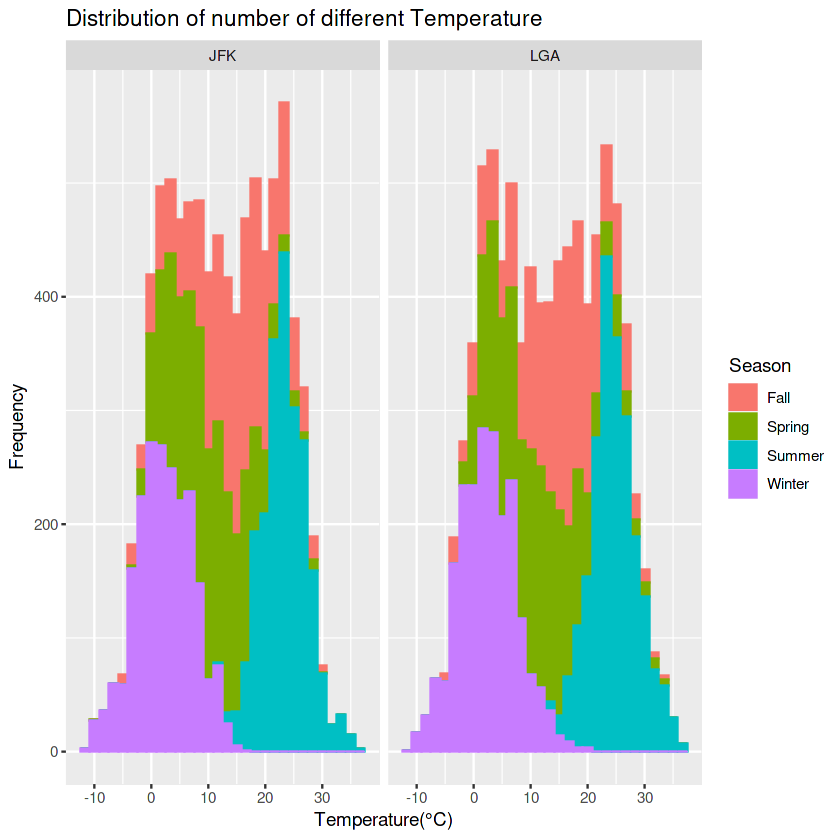

In [12]:
ggplot(hwd, aes(temp, color=season, fill=season)) +
    geom_histogram(bindwidth = 1)+
    facet_wrap(~origin)+  #divide the chart to two different origin airport
    labs(title = "Distribution of number of different Temperature",  #graph title
         x = "Temperature(°C)",  #x-label
         y = "Frequency",  #y-label
         color = "Season",  #legends label
         fill = "Season" 
         )

### 2. Distribution of Average Temperature of each Month

Using `mean()` function to calculate the mean of the `temp` and named the average temperature as `avg_temp` that contains `avgtemp` and group by `origin` and `month` columns.

In [13]:
avg_temp <- summarise(group_by(hwd,origin,month),  #avg_temp as new categories dataset which group by origin and month from hwd dataset
                      avgtemp=mean(temp))  #avgtemp as the mean temp of both origin in every month

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



Using `ggplot` and `geom_bar` function to create a bar chart that distribute the `avg_temp` by `month`.\
Different color of bar represent different `origin`.\
Using `scale_x_discrete` function to label the x-axis with shortened name.

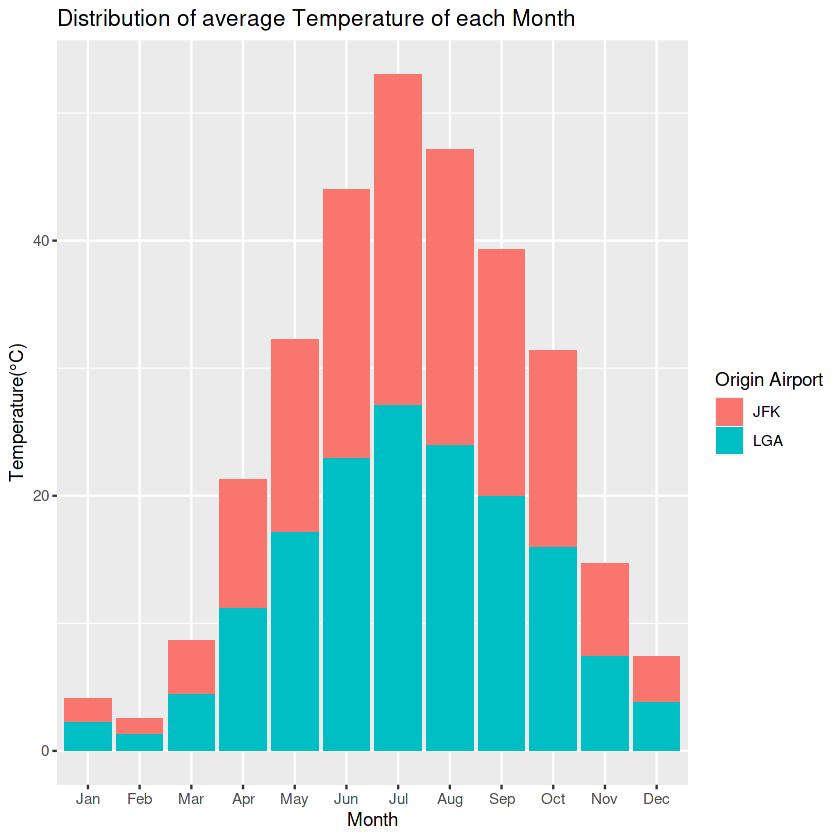

In [14]:
ggplot(avg_temp, aes(as.factor(month),avgtemp, group=origin, fill=origin)) +  #x-axis as month, y-axis as avg_temp, the different color represent the different origin
  geom_bar(stat="identity") +  #represent the values by the heights of the bars
  scale_x_discrete(labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) +  #position scales for discrete data in x-axis 
  labs(title = "Distribution of average Temperature of each Month",  #create the title, x-axis, y-axis, and the legends labels
       x = "Month",
       y = "Temperature(°C)",
       fill = "Origin Airport")

### 3. Distribtion of Average Temperature and Dewpoint

Using `mean()` function to calculate the mean of `temp` and `dewp` and named them as `temp_dewp` that contains `avg_temp`, `avg_dewp` and group by `origin`, `month` columns.

In [15]:
temp_dewp <- summarise(group_by(hwd,origin,month),  #temp_dewp as new categories dataset which group by origin and month from hweather2 dataset
                       avg_temp=mean(temp),  #avg_temp as the mean temp of both origin in every month
                       avg_dewp=mean(dewp))  #avg_dewp as the mean dewp of both origin in every month

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



Using `ggplot` and `geom_line` function to create a line chart that distribute the `avg_temp` and `dewp`.\
Different color of line represent different `origin`.\
Using `scale_x_viridis` function for better color palette in plots.

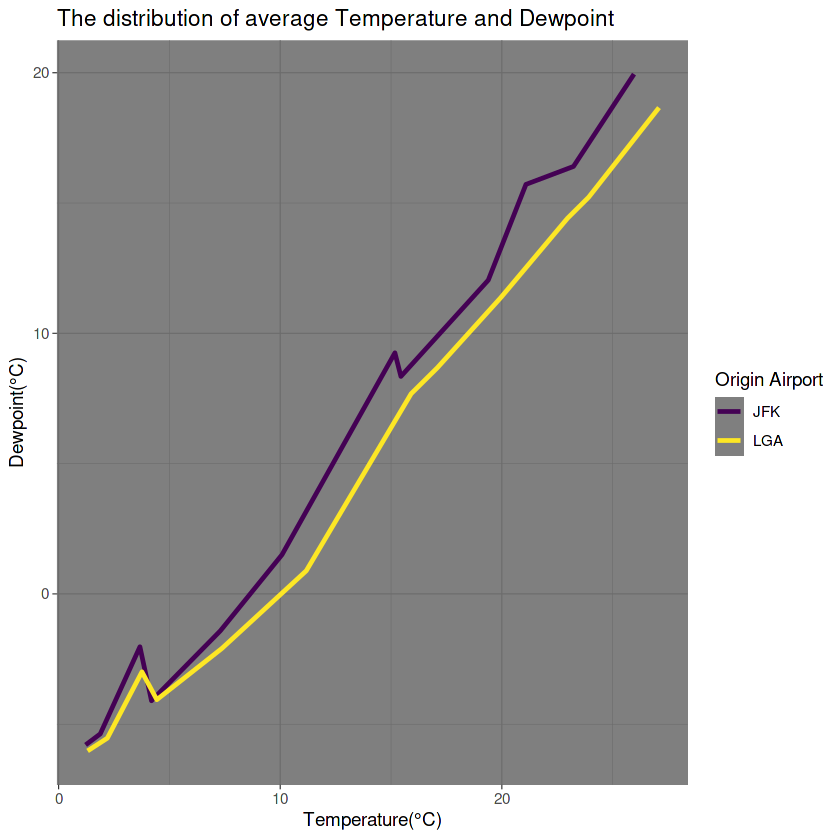

In [16]:
ggplot(temp_dewp, aes(x=avg_temp, y=avg_dewp, group=origin, color=origin)) +  #x-axis as avg_temp, y-axis as avg_dewp, the different color represent the different origin
  geom_line(size=1) +  #represent the data in line chart with the line size of 1
  scale_color_viridis(discrete = TRUE) +  #better color palette in plots
  labs(title = "The distribution of average Temperature and Dewpoint",  #create the title, x-axis, y-axis, and the legends labels
       x = "Temperature(°C)",
       y = "Dewpoint(°C)",
       color = "Origin Airport") +
  theme_dark()  #dark theme in plots 

### 4. The distribution of Temperature and Humidity

Using `ggplot` and `geom_boxplot` function to create a box plot that distribute the `temp` and `humid`.\
Different color in the box plot represent different `origin`.\
Using `facet_wrap` function to divide the histogram into two origin airport `JFK` & `LGA`.

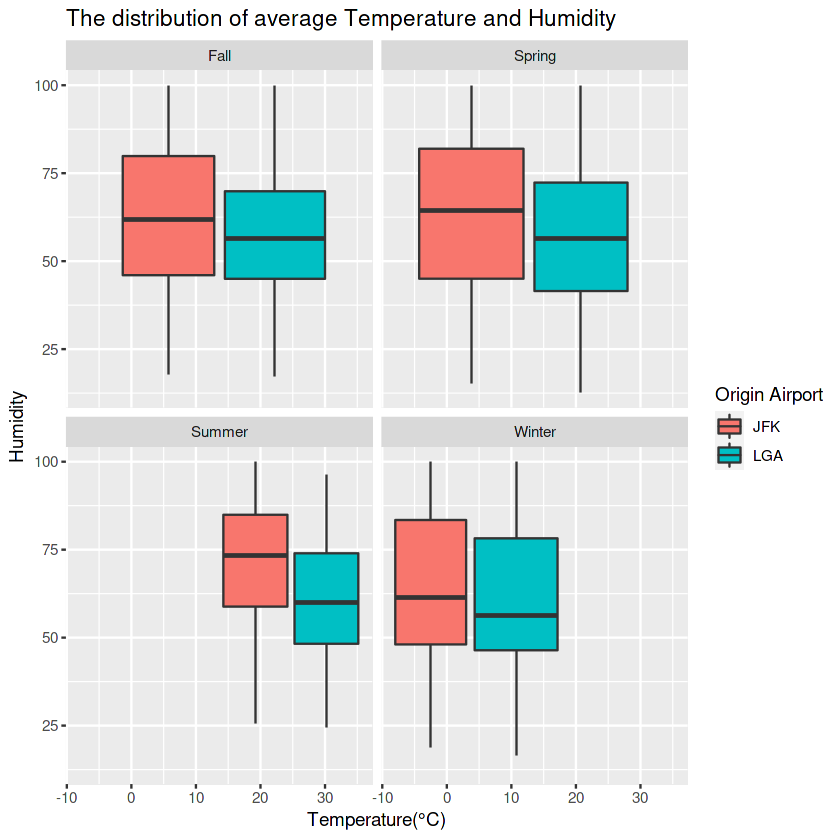

In [17]:
ggplot(hwd, aes(x=temp, y=humid, fill=origin)) +  #x-axis as temp, y-axis as humid, the different color represent the different origin
  geom_boxplot() +  #represent the data in box plot
  labs(title = "The distribution of average Temperature and Humidity",  #create the title, x-axis, y-axis, and the legends labels
     x = "Temperature(°C)",
     y = "Humidity",
     fill = "Origin Airport") +
  facet_wrap(~season)  #divide the chart to four season

### 5. Relationship between Humidity and Precipitation

Using `mean()` function to calculate the mean of `humid` and `precip` and named them as `temp_precip` that contains `avg_humid`, `avg_precip` and group by `origin`, `month`, `season` columns.

In [18]:
temp_precip <- summarise(group_by(hwd,origin,month,season),  #temp_precip as new categories dataset which group by origin, month, and season
                        avg_humid=mean(humid),  #avg_humid as the mean humid of both origin in every month and season
                        avg_precip=mean(precip))  #avg_precip as the mean precip of both origin in every month and season

`summarise()` has grouped output by 'origin', 'month'. You can override using the `.groups` argument.



Using `ggplot`, `geom_point` and `geom_line` function to create a scatter plot that distribute the `avg_humid` and `avg_precip` and connect each point with line.\
Different color of the point represent different `season`.\
Using `facet_wrap` function to divide the histogram into two origin airport `JFK` & `LGA`.\
`theme_light` used for a lighter theme in plots.

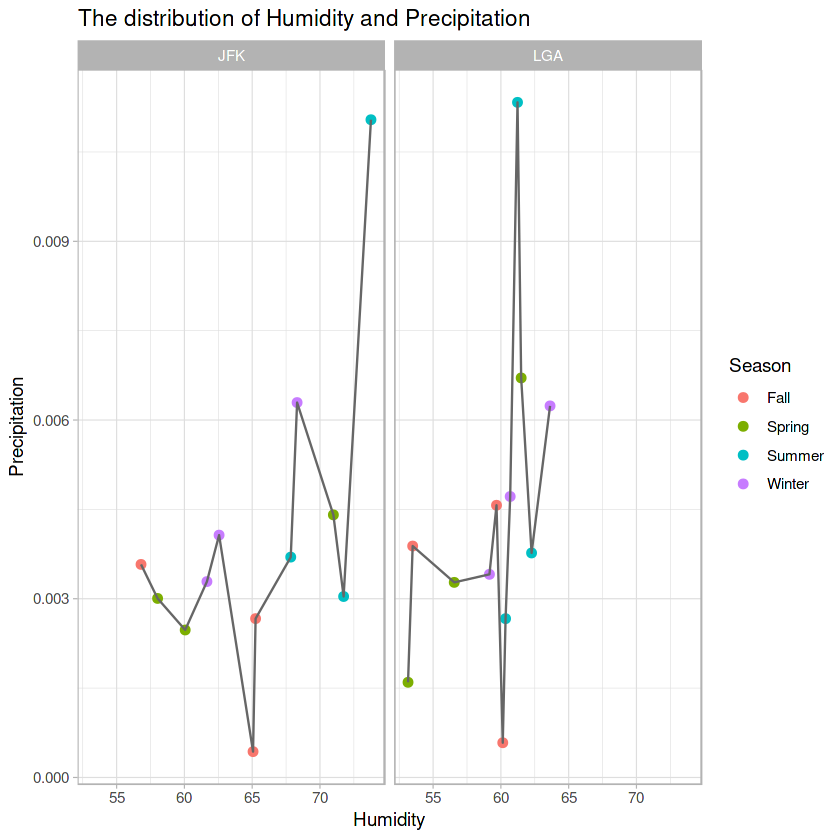

In [19]:
ggplot(temp_precip, aes(x=avg_humid, y=avg_precip, group=1, color=season)) +  #x-axis as avg_humid, y-axis as avg_precip, group=1 as the dummy grouping to override the default behavior, and the different color represent the different origin
  geom_point(size=2) +  #represent the data in scatter plot with the point size of 2
  geom_line(color="#666666") +  #represent the data in line chart with the grey color (#666666)
  labs(title = "The distribution of Humidity and Precipitation", #create the title, x-axis, y-axis, and the legends labels
       x = "Humidity",
       y = "Precipitation",
       color = "Season") +
  facet_wrap(~origin) +  #divide the chart to two origin airport
  theme_light()  #light theme in plots

### 6. Relationship between Dew point and Humidity

Using `mean()` function to calculate the mean of `dewp` and `humid` and named them as `dewp_humid` that contains `avg_dewp`, `avg_humid` and group by `origin`, `month` columns.

In [20]:
dewp_humid <- summarise(group_by(hwd,origin,month),  #dewp_humid as new categories dataset which group by origin and month from hweather2 dataset
                         avg_dewp=mean(dewp),  #avg_dewp as the mean dewp of both origin in every month
                         avg_humid=mean(humid))  #avg_humid as the mean humid of both origin in every month

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



Using `ggplot`, `geom_point` and `geom_smooth` function to create a scatter plot and smoothing graph that distribute the `avg_dewp` and `avg_humid`.\
Different color in the smoothing fill color represent different `origin`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



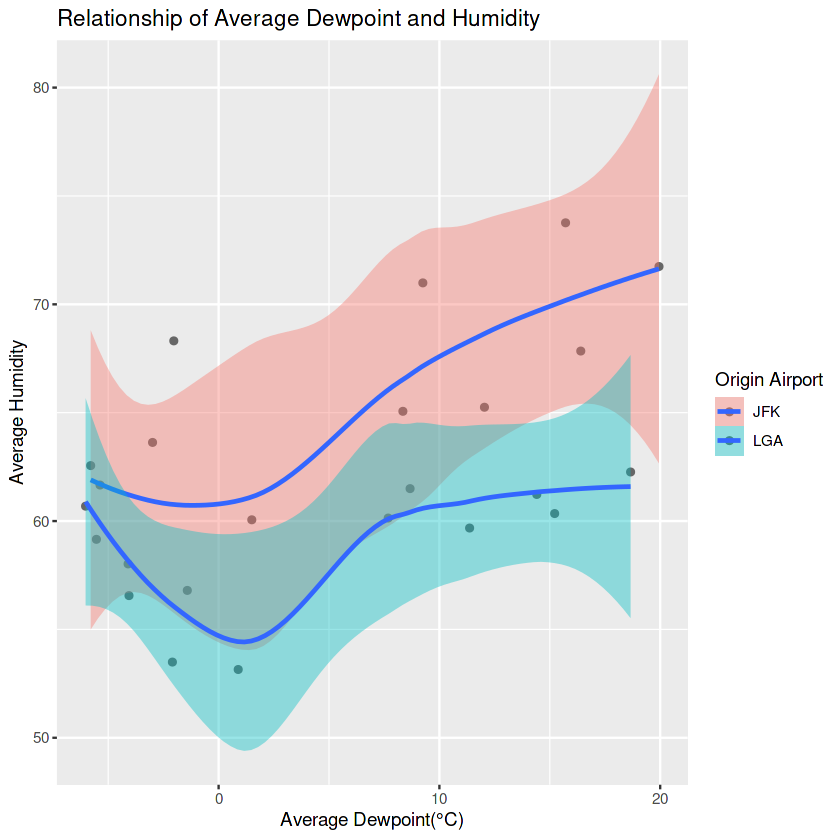

In [21]:
ggplot(dewp_humid, aes(x=avg_dewp, y=avg_humid, fill=origin)) +  #x-axis as avg_dewp, y-axis as avg_humid, and the different color represent the different origin
  geom_point(color="#666666") +  #represent the values in scatter plot by grey color
  geom_smooth() +  #Smoothing line plot represent to view the trends
  labs(title = "Relationship of Average Dewpoint and Humidity",  #create the title, x-axis, y-axis, and the legends labels
       x = "Average Dewpoint(°C)",
       y = "Average Humidity",
       fill = "Origin Airport")

### 7. Distribution of the Temperature and Pressure

Using `mean()` function to calculate the mean of `temp` and `pressure` and named them as `temp_pressure` that contains `avg_temp`, `avg_pressure` and group by `origin`, `month` columns.

In [22]:
temp_presssure <- summarise(group_by(hwd,origin,month),  #temp_pressure as new categories dataset which group by origin and month
                         avg_temp=mean(temp),  #avg_temp as the mean temp of both origin in every month
                         avg_pressure=mean(pressure))  #avg_pressure as the mean pressure of both origin in every month

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



Using `ggplot`, `geom_line` and `geom_point` function to create a scatter plot that distribute the `avg_temp` and `avg_pressure` and connect each point with line.\
Different color of line and shape of point represent different `origin`.\
Using `guides()` function to set the color and shape legends.\
`theme_light` used for a lighter theme in plots.

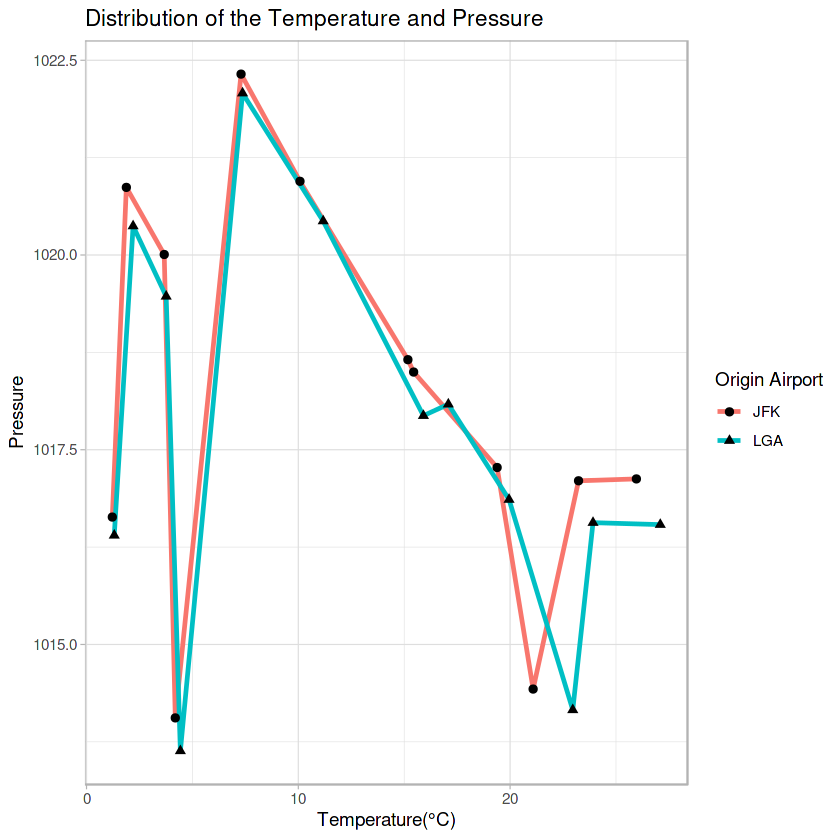

In [23]:
ggplot(temp_presssure, aes(x=avg_temp, y=avg_pressure, color=origin, shape=origin)) + #x-axis as avg_temp, y-axis as avg_pressure, and the different color represent the different origin
  geom_line(size=1) +  #represent the values in line chart with the line size of 1
  geom_point(size=2,color="black") +  #represent the values in scatter plot by the point size of 2 and black color
  guides(color=guide_legend(), shape=guide_legend()) +  #set scale-by-scale for each scale of guides 
  labs(title = "Distribution of the Temperature and Pressure",  #create the title, x-axis, y-axis, and the legends labels
       x = "Temperature(°C)",
       y = "Pressure",
       color = "Origin Airport",
       shape = "Origin Airport") +
  theme_light()  #light theme in plots

### 8. Distribution of Dewpoint and Humidity

Using `ggplot`, `geom_count` and `geom_smooth` function to create a count overlapping point and smoothing graph that distribute the `dewp` and `humid`\
Different color of point represent different `origin`.

`geom_smooth()` using formula 'y ~ x'



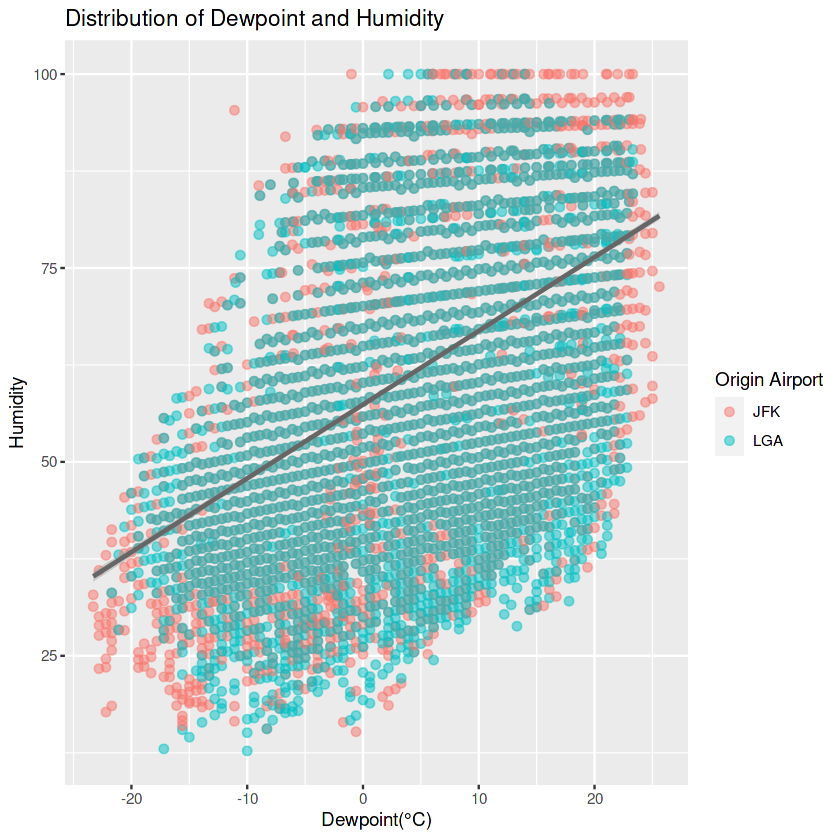

In [24]:
ggplot(hwd, aes(x=dewp, y=humid, color=origin)) +  #x-axis as dewp, y-axis as humid, and the different color represent the different origin
  geom_count(size=2, alpha=0.5) +  #represent the values in count overlapping points plot with the point size of 2 and 50% transparency
  geom_smooth(method="lm", color="#666666", se=TRUE) +  #Smoothing line plot represent to view the trends, loess is used when less than 1,000 observations
    labs(title = "Distribution of Dewpoint and Humidity",  #create the title, x-axis, y-axis, and the legends labels
       x = "Dewpoint(°C)",
       y = "Humidity",
       color = "Origin Airport")

### 9. Distribution of Dew point and Visibility

Using `mean()` function to calculate the mean of `dewp`, `visib` and `temp` and named them as `dewp_visib` that contains `avg_dewp`, `avg_visib`, `avg_temp` and group by `origin`, `month` columns.

In [25]:
dewp_visib <- summarise(group_by(hwd,origin,month),  #temp_pressure as new categories dataset which group by origin and month
                            avg_dewp=mean(dewp),  #avgdewp as the mean dewp of both origin in every month
                            avg_visib=mean(visib),  #avg_visib as the mean visib of both origin in every month
                            avg_temp=mean(temp))  #avg_temp as the mean temp of both origin in every month

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



Using `ggplot`, `geom_point` and `geom_line` function to create a scatter plot that distribute the `avg_dewp` and `avg_visib` and connect each point with line.\
The darker the color of point represent the lower the `temp`.\
Using `facet_wrap` function to divide the histogram into two origin airport `JFK` & `LGA`.\

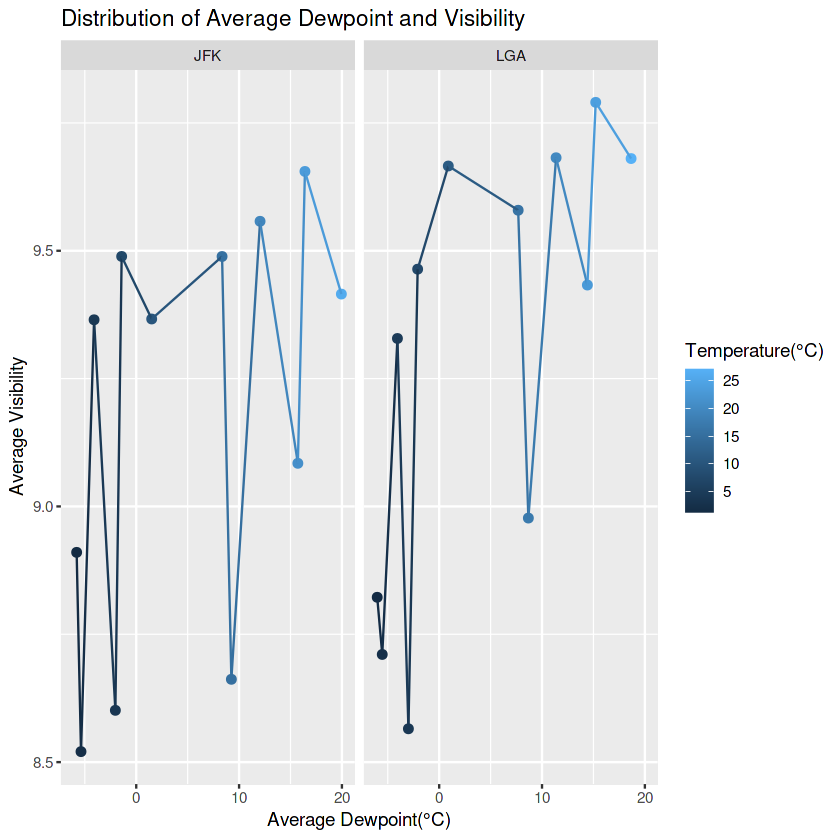

In [26]:
ggplot(dewp_visib, aes(x=avg_dewp, y=avg_visib, color=avg_temp)) +  #x-axis as average dewp, y-axis as average visib, and the different color represent the different temp
  geom_point(size=2) +  #represent the values in line chart with the line size of 2
  geom_line() +  #represent the values in line chart
  labs(title = "Distribution of Average Dewpoint and Visibility",  #create the title, x-axis, y-axis, and the legends labels
       x = "Average Dewpoint(°C)",
       y = "Average Visibility",
       color = "Temperature(°C)") +
  facet_wrap(~origin)  #divide the chart with both origin airport

### 10. The distribution of Wind Speed in different Wind Direction

Using `ggplot` and `geom_bar` function to create a bar chart that distribute the `wind_dir` and `wind_speed`.\
Different color of bar represent different `season`.

Warning message:
“position_stack requires non-overlapping x intervals”


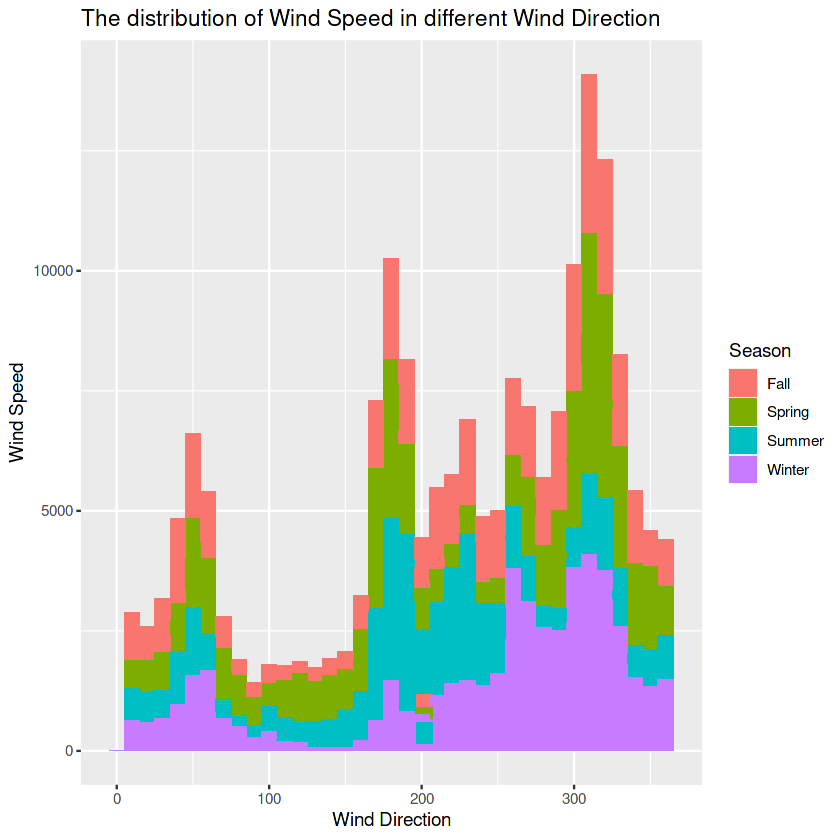

In [27]:
ggplot(hwd, aes(x=wind_dir, y=wind_speed, fill=season)) +  #x-axis as wind_dir, y-axis as wind_speed, and the different color represent the different season
  geom_bar(width=10,stat="identity") +  #represent the values by the heights of the bars
  labs(title = "The distribution of Wind Speed in different Wind Direction",  #create the title, x-axis, y-axis, and the legends labels
     x = "Wind Direction",
     y = "Wind Speed",
     fill = "Season")

### 11. The distribution of hourly wind gust of the day with highest Wind Gust in LGA

Using the `filter()` function to identify the highest wind_gust of each origin and create a variable to store the corresponding day of data named `max_wg`.

In [28]:
hwd %>% filter(origin=="LGA") %>% summarise(max(wind_gust))  #filter out the highest wind_gust of LGA airport
hwd %>% filter(origin=="LGA", wind_gust=="62.14212")          #filter out the data row of the highest wind_gust (62.14212) in LGA
max_wg <- (hwd %>% filter(origin=="LGA", month==1, day==31))  #max_wg as new categories dataset which group the highest wind_gust data in LGA

max(wind_gust)
<dbl>
62.14212


origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,season
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
LGA,2013,1,31,3,13.9,12.2,93.65,180,35.67418,62.14212,0.15,1017.932,2,31/01/2013 03:00,Winter


Using `ggplot`, `geom_histogram`, `geom_point` and `geom_line` function to create a histogram and scatter plot that distribute the `avg_temp` and `avg_pressure` and connect each point with line.\
The darker the color in histogram represent the lower the `wind_speed`.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


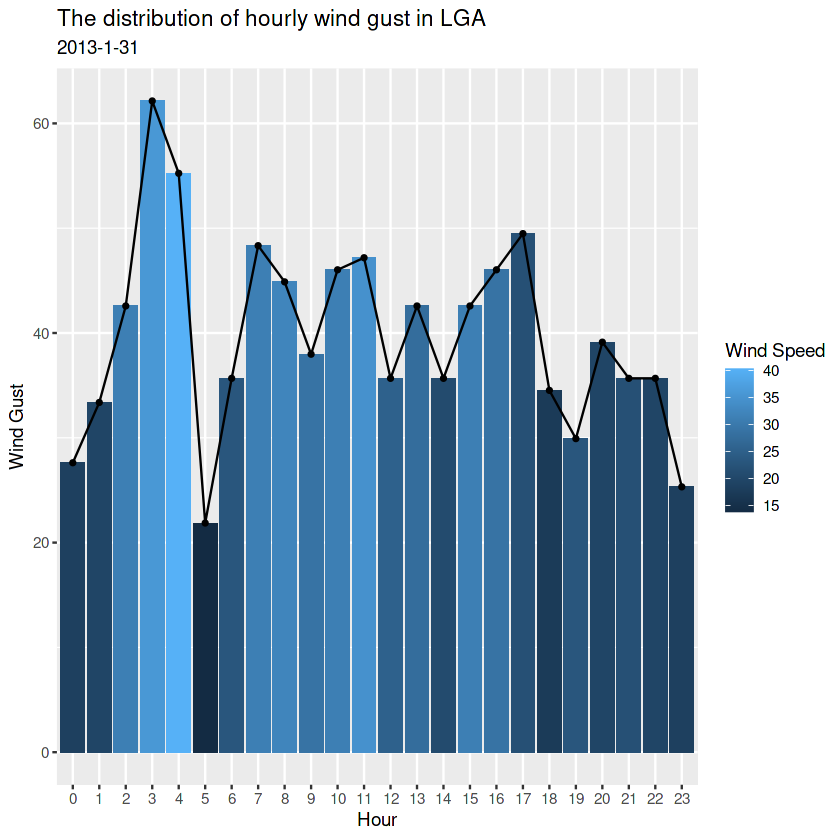

In [29]:
ggplot(max_wg, aes(x=as.factor(hour), y=wind_gust, fill=wind_speed, group=1)) +  #x-axis as hour, y-axis as wind_gust, and the different color represent the different wind_speed
  geom_histogram(stat="identity") +  #represent the values by the heights of the bars
  geom_point(size=1) +  #represent the values in scatter plot with the line size of 2
  geom_line(size=0.5) +  #represent the values in line chart with the line size of 1
  labs(title = "The distribution of hourly wind gust in LGA",  #create the title, x-axis, y-axis, and the legends labels
       subtitle = "2013-1-31",
       x = "Hour",
       y = "Wind Gust",
       fill = "Wind Speed")


### 12. Distribution of Wind Speed and Precipitation

Using `ggplot` and `geom_smooth` function to create a smoothing graph that distribute the `precip` and `wind_speed`.\
Different color of the line represent different `origin`.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



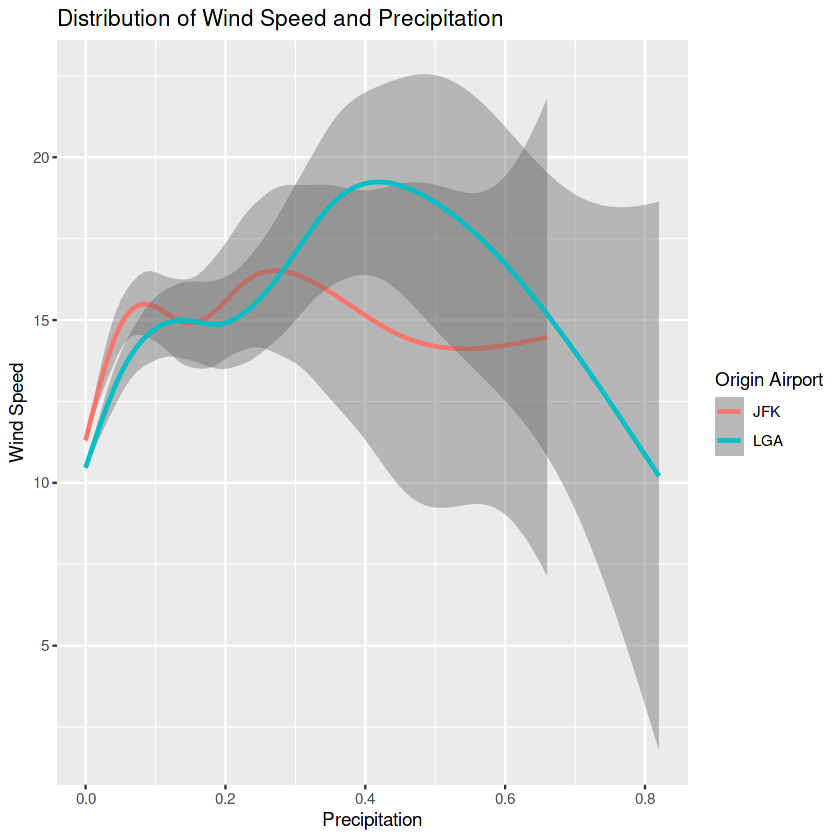

In [30]:
ggplot(hwd, aes(x=precip, y=wind_speed, color=origin)) + #x-axis as precip, y-axis as wind_speed, and the different color represent the different origin
  geom_smooth(size=1, fill="#666666") + #Smoothing line plot present to view the trends in the size of 2 and grey color
  labs(title = "Distribution of Wind Speed and Precipitation", #create the title, x-axis, y-axis, and the legends labels
       x = "Precipitation",
       y = "Wind Speed",
       color = "Origin Airport")

### 13. Distribution of Average Precipitation and Visibility

Using `mean()` function to calculate the mean of `dewp`, `visib` and named them as `precip_visib` that contains `avg_precip`, `avg_visib` and group by `origin`, `month` columns.

In [31]:
precip_visib <- summarise(group_by(hwd,origin,month), #temp_pressure as new categories dataset which group by origin and month from hweather2 dataset
                        avg_precip=mean(dewp), #avg_precip as the mean precip of both origin in every month
                        avg_visib=mean(visib)) #avg_visib as the mean visib of both origin in every month

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



Using `ggplot`, `geom_smooth` and `geom_point` function to create a scatter plot and smoothing graph that distribute the `avg_dewp` and `avg_humid`.\
Different color of the point represent different `origin`.
Using `guides()` function to set the color and shape legends.\
`theme_light` used for a lighter theme in plots.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



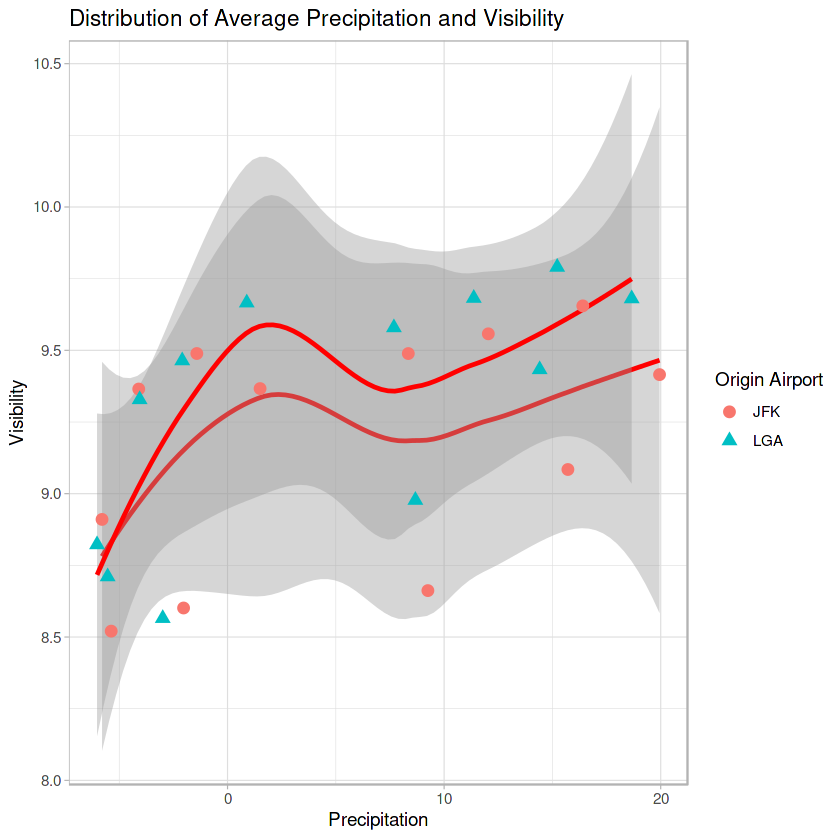

In [32]:
ggplot(precip_visib, aes(x=avg_precip, y=avg_visib, shape=origin, color=origin)) + #x-axis as avg_precip, y-axis as avg_visib
  geom_smooth(color="red") + #Smoothing line plot present to view the trends in red color
  geom_point(size=3) + #present the values in scatter plot with the different shape and color represent the origin by the size of 3
  guides(color=guide_legend(), shape=guide_legend()) + #set scale-by-scale for each scale of guides 
  labs(title = "Distribution of Average Precipitation and Visibility", #create the title, x-axis, y-axis, and the legends labels
       x = "Precipitation",
       y = "Visibility",
       shape= "Origin Airport",
       color = "Origin Airport") +
  theme_light() #light theme in plots